# Convolutional Neural Network

## Importing the libraries

In [1]:
import tensorflow as tf

2024-10-22 21:30:17.628719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-22 21:30:17.653005: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-22 21:30:17.658826: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-22 21:30:17.673345: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Verify GPU Availability

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))

Num GPUs Available:  1


I0000 00:00:1729621822.664808    7623 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729621822.677597    7623 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729621822.677704    7623 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


## Set Memory Growth for GPU

In [3]:
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        # Set memory growth to avoid occupying the entire GPU memory
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)
training_set = train_datagen.flow_from_directory(
    "dataset/training_set", target_size=(64, 64), batch_size=32, class_mode="binary"
)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [5]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)
test_set = test_datagen.flow_from_directory(
    "dataset/test_set", target_size=(64, 64), batch_size=32, class_mode="binary"
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [6]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

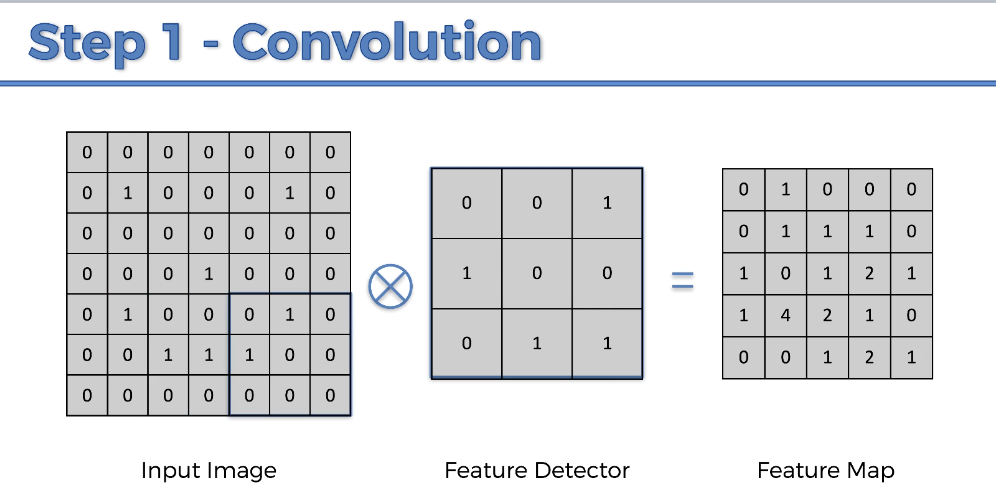

In [7]:
cnn.add(
    tf.keras.layers.Conv2D(
        filters=32,  # Number of filters (feature detectors)
        kernel_size=3,  # Size of the kernel (3x3 filter)
        activation="relu",  # Activation function applied to the output
        input_shape=(64, 64, 3),  # Input shape (height, width, channels)
    )
)

/home/ohms/miniconda3/envs/.tensorflow/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1729621823.421575    7623 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729621823.421839    7623 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729621823.421932    7623 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729621824.468279    

### Step 2 - Pooling

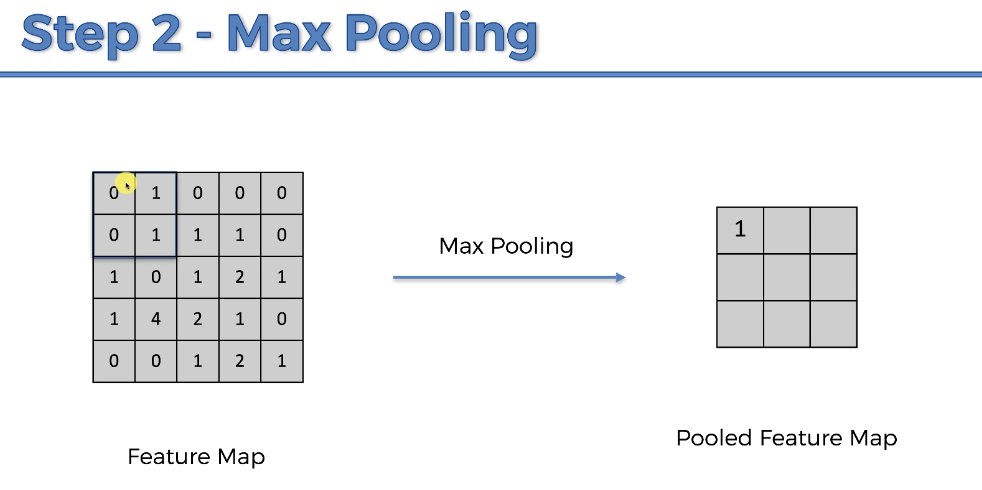

In [8]:
cnn.add(
    tf.keras.layers.MaxPool2D(
        pool_size=(2, 2),  # Size of the pooling window
        strides=2,  # Step size for moving the pooling window
    )
)

### Adding a second convolutional layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [10]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))

### Step 5 - Output Layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

## Summary of the Model

In [13]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

## Part 3 - Training the CNN

### Compiling the CNN

In [14]:
cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

### Training the CNN on the Training set and evaluating it on the Test set

In [15]:
cnn.fit(x=training_set, validation_data=test_set, epochs=30)

/home/ohms/miniconda3/envs/.tensorflow/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1729621830.146063    7731 service.cc:146] XLA service 0x7f7e3800b870 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729621830.146243    7731 service.cc:154]   StreamExecutor device (0): Quadro T2000, Compute Capability 7.5
2024-10-22 21:30:30.293315: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-22 21:30:31.149668: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  1/250 ━━━━━━━━━━━━━━━━━━━━ 36:53 9s/step - accuracy: 0.5312 - loss: 0.7009

I0000 00:00:1729621836.415804    7731 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


224/250 ━━━━━━━━━━━━━━━━━━━━ 20s 782ms/step - accuracy: 0.5462 - loss: 0.6872

/home/ohms/miniconda3/envs/.tensorflow/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-10-22 21:34:30.877804: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng20{k2=2,k4=2,k5=0,k6=0,k7=0,k19=0} for conv (f32[16,32,62,62]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,3,64,64]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is takin

250/250 ━━━━━━━━━━━━━━━━━━━━ 210s 809ms/step - accuracy: 0.5499 - loss: 0.6855 - val_accuracy: 0.5910 - val_loss: 0.6534
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 206s 825ms/step - accuracy: 0.6312 - loss: 0.6358 - val_accuracy: 0.7015 - val_loss: 0.5763
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 196s 783ms/step - accuracy: 0.6497 - loss: 0.6226 - val_accuracy: 0.6255 - val_loss: 0.6749
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 196s 782ms/step - accuracy: 0.6865 - loss: 0.5921 - val_accuracy: 0.7215 - val_loss: 0.5585
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 185s 741ms/step - accuracy: 0.6770 - loss: 0.5996 - val_accuracy: 0.6535 - val_loss: 0.6317
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 220s 881ms/step - accuracy: 0.7008 - loss: 0.5688 - val_accuracy: 0.7400 - val_loss: 0.5281
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 231s 923ms/step - accuracy: 0.7110 - loss: 0.5591 - val_accuracy: 0.7400 - val_loss: 0.5091
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 215s 862ms/step - accuracy: 0.7046 - loss: 0.56

## Part 4 - Making a single prediction

In [17]:
import numpy as np

test_image = tf.keras.preprocessing.image.load_img(
    "dataset/single_prediction/cat_or_dog_1.jpg", target_size=(64, 64)
)
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(
    test_image, axis=0
)  # adding a dimension to the array as it was passed as batches in begining

result = cnn.predict(test_image)  # 1 is dog 0 is cat
training_set.class_indices  # to get the dictionary of classes which is cat and which is dog
if result[0][0] == 1:  # accessing batch then first element of batch
    prediction = "dog"
else:
    prediction = "cat"

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


In [18]:
print(prediction)

dog


In [27]:
test_image = tf.keras.preprocessing.image.load_img(
    "dataset/single_prediction/test1.jpg", target_size=(64, 64)
)
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(
    test_image, axis=0
)  # adding a dimension to the array as it was passed as batches in begining

results = cnn.predict(test_image)  # 1 is dog 0 is cat
training_set.class_indices  # to get the dictionary of classes which is cat and which is dog
if results[0][0] == 1:  # accessing batch then first element of batch
    predictions = "dog"
else:
    predictions = "cat"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [28]:
print(predictions)

cat
